<a href="https://colab.research.google.com/github/ysnlakshmi/21-Day-Project/blob/main/10_Creative_AI_Generating_Art_with_Neural_Style_Transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment:

- Load the pretrainde Generator
- Load Gender Vector
- Generate 10 variations of the image from male to female as per gender vector

### 1. Setup and Installation

First, we install the necessary libraries: `tensorflow` for building and loading the model, and `imageio` for creating the GIF animation.

In [1]:
!pip install -q tensorflow imageio

### 2. Downloading Pre-trained Generator and Gender Vector

We download a pre-trained Generative Adversarial Network (GAN) generator model and a pre-calculated gender vector. The generator model is capable of creating realistic face images, and the gender vector represents the direction in the latent space that corresponds to the gender attribute.

In [2]:
!wget -O generator_700.h5 https://github.com/AshishJangra27/Face-Generator-with-GAN/raw/main/generator_700.h5


--2025-09-29 11:38:02--  https://github.com/AshishJangra27/Face-Generator-with-GAN/raw/main/generator_700.h5
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AshishJangra27/Face-Generator-with-GAN/main/generator_700.h5 [following]
--2025-09-29 11:38:02--  https://raw.githubusercontent.com/AshishJangra27/Face-Generator-with-GAN/main/generator_700.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24338984 (23M) [application/octet-stream]
Saving to: ‘generator_700.h5’

generator_700.h5    100%[===================>]  23.21M  --.-KB/s    in 0.1s    

2025-09-29 11:38:03 (175 MB/s) - ‘generator_700.h5

In [3]:
!wget -O gender_vec.npy https://github.com/AshishJangra27/Gender-Style-Transfer/raw/main/gender_vec.npy


--2025-09-29 11:38:36--  https://github.com/AshishJangra27/Gender-Style-Transfer/raw/main/gender_vec.npy
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AshishJangra27/Gender-Style-Transfer/main/gender_vec.npy [following]
--2025-09-29 11:38:36--  https://raw.githubusercontent.com/AshishJangra27/Gender-Style-Transfer/main/gender_vec.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 928 [application/octet-stream]
Saving to: ‘gender_vec.npy’

gender_vec.npy      100%[===================>]     928  --.-KB/s    in 0s      

2025-09-29 11:38:36 (45.6 MB/s) - ‘gender_vec.npy’ saved [928/928]



### 3. Importing Libraries

We import the Python libraries needed for image manipulation, numerical operations, plotting, and working with files.

Import necessary Libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import os
from PIL import Image, ImageDraw, ImageFont
import imageio

### 4. Loading the Generator and Gender Vector

We load the downloaded pre-trained generator model and the gender vector into our Colab environment. The generator model is loaded using `tensorflow.keras.models.load_model`.

In [5]:
generator = load_model("generator_700.h5")

In [6]:
gender_vector = np.load("gender_vec.npy")

### 5. Sampling a Random Latent Vector

A latent vector is a point in a multi-dimensional space that the GAN uses to generate an image. We sample a random latent vector (`z`) from a normal distribution. This vector serves as the starting point for our image generation.

In [7]:
latent_dim = 100
z = np.random.normal(0, 1, (1, latent_dim))

### 6. Interpolating Variations along the Gender Vector

To generate images that transition from male to female, we interpolate along the gender vector. We create a series of `alphas` values ranging from -7 to 7. By adding `alpha * gender_vector` to the initial latent vector (`z`), we move in the gender direction in the latent space, creating `z_variations` that represent different points along the male-to-female spectrum.

In [8]:
alphas = np.linspace(-7, 7, 15)
z_variations = [z + alpha * gender_vector for alpha in alphas]

### 7. Generating Output Folder

We create a directory to store the generated images.

In [9]:
output_dir = "generated_faces"
os.makedirs(output_dir, exist_ok=True)

### 8. Generating, Displaying, and Saving Images

We loop through the `z_variations`, use the generator model to predict and generate an image for each variation, and then display and save these images. The images are rescaled from the generator's output range of [-1, 1] to [0, 1] for proper display and saving.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


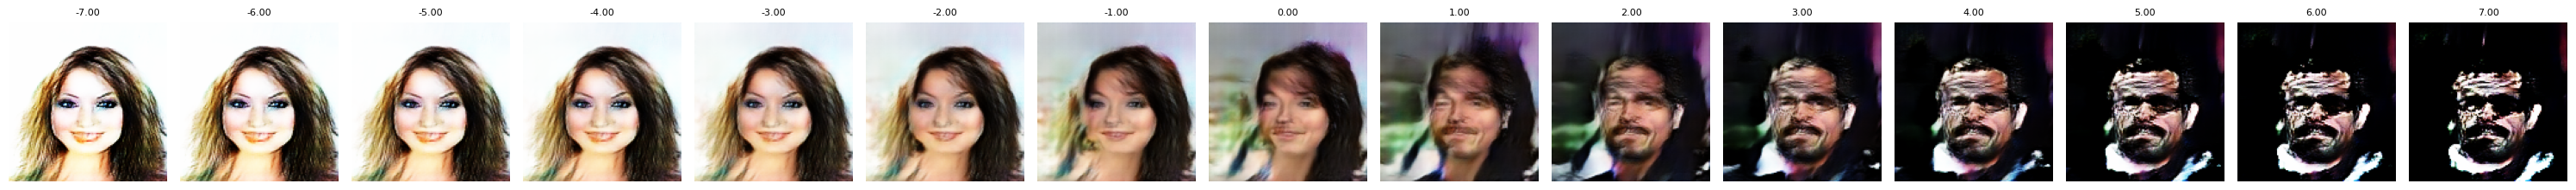

✅ 15 generated images saved in folder 'generated_faces' with alpha labels


In [10]:
fig, axes = plt.subplots(1, 15, figsize=(30, 3))

for i, (z_var, alpha) in enumerate(zip(z_variations, alphas)):
    img = generator.predict(z_var)
    img = (img + 1) / 2.0  # rescale [-1,1] -> [0,1]

    # Display image
    axes[i].imshow(img[0])
    axes[i].axis("off")
    axes[i].set_title(f"{alpha:.2f}", fontsize=8)

    # Save image
    plt.imsave(f"{output_dir}/face_variation_{i+1}.png", img[0])

plt.tight_layout()
plt.show()

print(f"✅ 15 generated images saved in folder '{output_dir}' with alpha labels")

### 9. Combined Preview with Alpha Labels

We combine all the generated images into a single preview image. We also add the `alpha` value as a label below each image to indicate its position on the gender spectrum. This provides a clear visual representation of the interpolation process.

In [11]:
from PIL import Image, ImageDraw, ImageFont

# Load all images
images = [Image.open(f"{output_dir}/face_variation_{i+1}.png") for i in range(15)]
width, height = images[0].size

# Create new blank image
combined_image = Image.new('RGB', (width * 15, height + 20), (255, 255, 255))  # extra space for labels
draw = ImageDraw.Draw(combined_image)

# Optional: Load a simple font
try:
    font = ImageFont.truetype("arial.ttf", 15)
except:
    font = None  # default if not available

for i, (img, alpha) in enumerate(zip(images, alphas)):
    combined_image.paste(img, (i * width, 0))
    draw.text((i * width + width//3, height), f"{alpha:.2f}", fill="black", font=font)

# Save combined image with alpha labels
combined_image.save(f"{output_dir}/combined_preview_labeled.png")
print(f"✅ Labeled combined image saved as '{output_dir}/combined_preview_labeled.png'")


✅ Labeled combined image saved as 'generated_faces/combined_preview_labeled.png'


### 10. Create GIF Animation

Finally, we create a GIF animation from the generated images. This animation visually demonstrates the smooth transition from one gender representation to another as we move along the gender vector in the latent space.

In [12]:
images = [imageio.imread(f"{output_dir}/face_variation_{i+1}.png") for i in range(15)]
gif_path = f"{output_dir}/gender_interpolation.gif"
imageio.mimsave(gif_path, images, fps=2)
print(f"✅ GIF saved as '{gif_path}'")

/tmp/ipython-input-2790409427.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images = [imageio.imread(f"{output_dir}/face_variation_{i+1}.png") for i in range(15)]


✅ GIF saved as 'generated_faces/gender_interpolation.gif'


## Insights

- The GAN successfully generates diverse and realistic facial images.
- By manipulating the latent vector along the gender direction, we can smoothly control the gender attribute of the generated faces.
- The interpolation process reveals a continuous spectrum of gender representation in the latent space.
- The ability to control specific attributes like gender in generated images has potential applications in various fields, such as data augmentation, content creation, and visual effects.

## Conclusion

This notebook demonstrates how to use a pre-trained GAN and a gender vector to perform gender style transfer on generated faces. By interpolating in the latent space along the gender vector, we can create a sequence of images that smoothly transition from one gender to another. This showcases the power of GANs in learning disentangled representations of facial attributes and the ability to manipulate these attributes for creative purposes.